In [1]:
import numpy as np
import matplotlib.pyplot as plt

import numdifftools as nd

from scipy.optimize import minimize, fsolve

# $n$-Dimensional Root Finding and Least Squares

## Introduction

In this educational Jupyter notebook, we will root finding in higher dimensions and least square.

Nonlinear systems of equations are abacus in science, engineering, and economics, and many other fields. They often represent complex relationships where variables interact in nonlinear ways. Solving such systems is crucial for understanding and predicting real-world phenomena.

Linear least square fitting, is technique approximating linear relationship.

### $n$-Dimensional Root Finding with Linearization Method

$$
f: \mathbb{R}^n \rightarrow \mathbb{R}^n
$$

$$
f(x) = 0
$$

This method of locating roots is a numerical technique used to find approximate solutions to equations. It stands as a cornerstone of numerical analysis and plays a pivotal role in solving nonlinear systems. The core principles of this method revolve around iterative refinement and the linearization of the function.

$$
x_{n+1} = x_n - (Df)^{-1}(x_n)f(x_n)
$$

Notice the similarity between this equation and the one-dimensional version

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

In [3]:
def root_solve(f, x0, tol=1e-05,iterations=100):
    '''
   Return approximation of a root of f using the initial guess x0.
    '''
    Df = nd.Jacobian(f)
    for i in range(iterations):
        f_val = f(x0)
        Df_val = Df(x0)

        delta = np.linalg.inv(Df_val).dot(f_val)
        x0 = x0 - delta

        if np.linalg.norm(delta, 2) < tol or np.linalg.norm(f(x0), 2) < tol:
            print(f"{i} iterations completed\n")
            return x0
        
    # if we did not meet the tolerance in i iterations, raise an error
    raise ValueError("Newton-Raphson did not converge after {} iterations".format(iterations))

### Example
Solve
\begin{align}
  x^2 + y^2 = 2\\
  xy = 1
\end{align}

$$\vec{X_0} = <50,1>$$

In [4]:
def f(x):
    return np.array([
        x[0]**2 + x[1]**2 - 2,
        x[0]*x[1] - 1, 
    ])

x0 = np.array([50.0, 1])

solution = root_solve(f, x0)
print(f"Solution: {solution}")
print(f"|f(solution)| = {np.linalg.norm(f(solution))}")

print(fsolve(f, x0))

13 iterations completed

Solution: [1.00149536 0.99850464]
|f(solution)| = 5.000083906554612e-06
[1.00000001 0.99999999]


### Example
Solve
\begin{align}
  x^2 + y^2 + z^2 = 1 \\
  xy = 5 \\
  xyz = 0
\end{align}

$$\vec{X_0} = <2,5,0>$$

In [5]:
def f(x):
    return np.array([
        x[0]**2 + x[1]**2 + x[2]**2 - 40,
        x[0]*x[1] - 7.5,  # 5 * 1.5
        x[0]*x[1]*x[2]
    ])

x0 = np.array([5.0, 1.5, 0.0])

solution = root_solve(f, x0)
print(f"Solution: {solution}")
print(f"f(solution) = {np.linalg.norm(f(solution))}")

3 iterations completed

Solution: [6.20809924 1.20809924 0.        ]
f(solution) = 4.945208033268568e-11


### Example
Solve
$$
\begin{align}
  x^2 + y^2 + z^2 = 3\\
  x^2 y^2 - z = 2 \\
  xyz = 1

\end{align}
$$

$$\vec{X_0} = <20, 40, 60>$$

In [9]:
def f(x):
    return np.array([
        x[0]**2 + x[1]**2 + x[2]**2 - 3,
        x[0]**2 * x[1]**2 - x[2] - 2,
        x[0] * x[1] * x[2] - 1
    ])

x0 = np.array([20, 40, 60])

solution = root_solve(f, x0)
print(f"Solution: {solution}")
print(f"|f(solution)| = {np.linalg.norm(f(solution))}")

print(fsolve(f, x0))

42 iterations completed

Solution: [ 1.00107847 -0.99892153 -1.        ]
|f(solution)| = 3.489309463002016e-06
[ 1.00000001 -0.99999999 -1.        ]


### Example
Solve
$$
\begin{align}
  x^2 + y^2 - z^2 = 5\\
  y + z^2 - x^2 = 1 \\
  z + x^2 - y^2 = 0

\end{align}
$$

$$\vec{X_0} = <2,2,1>$$

In [7]:
def f(x):
    return np.array([
        x[0] + x[1]**2 - x[2]**2 - 5,
        x[1] + x[2]**2 - x[0]**2 - 1,
        x[2] + x[0]**2 - x[1]**2
    ])

x0 = np.array([2.0, 2.0, 1.0])

solution = root_solve(f, x0)
print(f"Solution: {solution}")
print(f"|f(solution)| = {np.linalg.norm(f(solution))}")

print(fsolve(f, x0))

2 iterations completed

Solution: [2.00257974 2.37362947 1.62379079]
|f(solution)| = 5.955934526422652e-07
[2.00257981 2.37362943 1.62379077]


### An example with fsolve

$$
f_1(x, y) = x^2 + y^2 - 4 = 0
$$

$$
f_2(x, y) = x - y = 0
$$

In [7]:
def f(xy):
    x, y = xy
    f1 = x**2 + y**2 - 4
    f2 = x - y
    return np.array([f1, f2])

In [8]:
initial_guess = [1.0, 1.0]

solutions = fsolve(f, initial_guess)

x_solution, y_solution = solutions

print("Solution found:")
print(f"x = {x_solution}, y = {y_solution}")
print("\nFunction value at solution:")
print(f"f(solution) = {f(solutions)}")


Solution found:
x = 1.4142135623730947, y = 1.4142135623730947

Function value at solution:
f(solution) = [-1.77635684e-15  0.00000000e+00]


## Least Squares

Let's explore another example, this time from the field of chemistry. Consider a chemical reaction with the following rate equation

$$
\text{Rate} = k A^2 B
$$

Here, Rate is the reaction rate, k is the rate constant, and A and B are the concentrations of reactants A and B, respectively. We want to find the rate constant k that best fits experimental data.



In [9]:
concentrations_A = np.array([1.0, 2.0, 3.0])
concentrations_B = np.array([0.5, 1.0, 1.5])

experimental_rates = np.array([0.1, 0.4, 0.9])

def rate_equation(k):
    predicted_rates = k * concentrations_A**2 * concentrations_B
    
    residuals = experimental_rates - predicted_rates
    
    return np.sum(residuals**2)


Optimized rate constant found: 0.06953125000000007


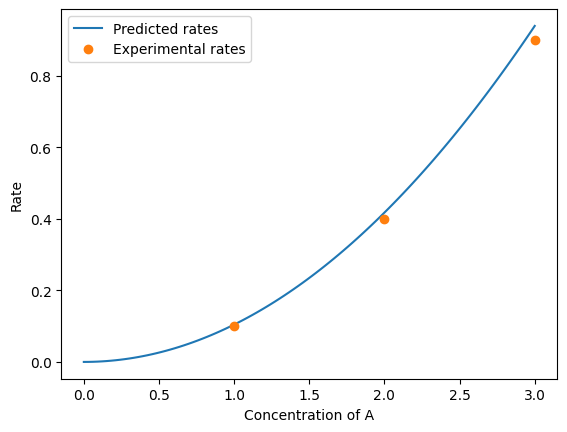

In [10]:
initial_guess = 0.1

result = minimize(rate_equation, initial_guess, method='Nelder-Mead')

optimized_k = result.x[0]

print("Optimized rate constant found:", optimized_k)
xs = np.linspace(0.0, 3.0, 100)
ys = optimized_k * xs**2 * 1.5
plt.plot(xs, ys, label='Predicted rates')
plt.plot(concentrations_A, experimental_rates, 'o', label='Experimental rates')
plt.xlabel('Concentration of A')
plt.ylabel('Rate')
plt.legend()


## Linear Least Squares

Linear least square fitting is a powerful mathematical and statistical technique used to model linear relationships between variables. It is widely applied in data science, statistics, economics, physics, and various other fields. In this section, we will explore the fundamental principles, mathematical formulation, and practical implementation of linear least squares fitting using NumPy.


Let's illustrate the concept of linear least square fitting with a detailed example. Consider a scenario where we have experimental data points representing a relationship between two variables, $X$ and $Y$. We want to fit a linear model to this data to describe the relationship and make predictions.

#### Mathematical Formulation

The linear model we want to fit has the following form $y=mx+b$.


In this equation:
- $Y$ represents the dependent variable (the one we want to predict).
- $X$ represents the independent variable (the one used for prediction).
- $m$ is the slope of the line (the coefficient that measures the rate of change).
- $b$ is the y-intercept (the value of $Y$ when $X$ is 0).


Our goal is to find the values of $m$ and $b$ that best fit the data. To do this, we will use the method of least squares.


#### The Method of Least Squares
The method of least squares aims to minimize the sum of the squared differences between the observed $Y$ values and the predicted $Y$ values. Define the **SSE** as follows:



$$SSE = \Sigma (Y_\text{observed} - Y_\text{predicted})^2$$


Thus to find the line best-fit we want $m$ and $b$ minimizing SSE. For the line the SSE is

$$ y(x_i) - y_i = m x_i + b - y_i$$

$$ SSE = \Sigma (m x_i + b - y_i)^2$$

$$ 
\frac{\partial SSE}{\partial m} = 2 \Sigma (m x_i + b - y_i) x_i = 2 \Sigma (m x_i^2 + b - x_iy_i)
$$

$$ \frac{\partial SSE}{\partial b} = 2 \Sigma (m x_i + b - y_i)$$

Set the derivatives to zero and solve for $m$ and $b$

$$
  \left[\begin{array}{cc}
      \sum_{i=0}^nx_i^2 &  \sum_{i=0}^nx_i\\
      \sum_{i=0}^nx_i & n+1
  \end{array}\right] 
  \left[\begin{array}{c}
      m \\ b
  \end{array}\right] =
  \left[\begin{array}{cc}
      \sum_{i=0}^nx_i y_i\\
      \sum_{i=0}^ny_i
  \end{array}\right] 
$$

Solve the system using `numpy.linalg.solve()`

Implement linear least square fitting by solving the above matrix equation with `np.linalg.solve()` and `scipy.optimize.minimize()`.
1. Prepare the data: Create NumPy arrays to store the observed $X$ and $Y$ values.
2. Define the linear model: Create a function that represents the linear model $Y = mX + b$.
3. Define the objective function: Create an objective function that calculates SSE given $m$ and $b$.
4. Find the values of $m$ and $b$ that minimize SSE using `scipy.optimize.minimize()`.


- **numpy matrix operations**

In [11]:
def llsq(X, Y):
    return np.array([[sum([x**2 for x in X]), sum([x for x in X])], [sum([x for x in X]), len(X)]])

In [12]:
X_observed = np.array([1, 2, 3, 4, 5])
Y_observed = np.array([2, 3.8, 6.1, 7.9, 10.1])

np.linalg.inv(llsq(X_observed, Y_observed)).dot(np.array([sum([x*y for x, y in zip(X_observed, Y_observed)]), sum(Y_observed)]))

array([ 2.03, -0.11])

- **scipy.optimize()**

In [13]:
X_observed = np.array([1, 2, 3, 4, 5])
Y_observed = np.array([2, 3.8, 6.1, 7.9, 10.1])

def linear_model(params, X):
    m, b = params
    return m * X + b

def objective_function(params):
    predicted_Y = linear_model(params, X_observed)
    residuals = Y_observed - predicted_Y
    return np.sum(residuals**2)

initial_guess = [1.0, 1.0] # m, b
result = minimize(objective_function, initial_guess, method='Nelder-Mead')

m, b = result.x

m,b


(2.0299930378045064, -0.10997147555045433)

#### Interpretation and Visualization

The optimized parameters $m$ and $b$ represent the slope and y-intercept of the best-fitting line ar model. We can use these values to make predictions


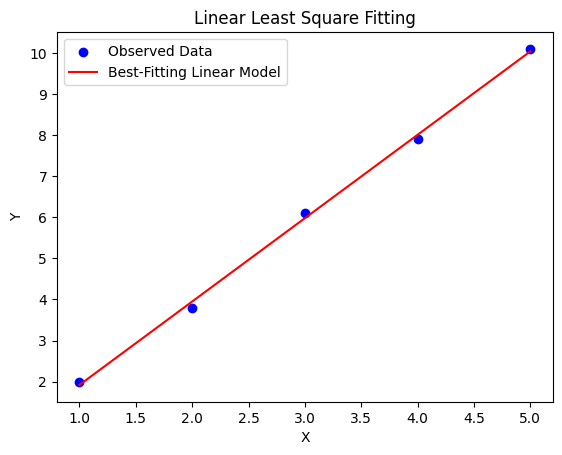

In [14]:
predicted_Y = linear_model([m, b], X_observed)

plt.scatter(X_observed, Y_observed, label="Observed Data", color='blue')
plt.plot(X_observed, predicted_Y, label="Best-Fitting Linear Model", color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Least Square Fitting")
plt.show()



# Exercises <a name="exercises"></a>

Reinforce your learning with exercises and quizzes:

### Exercise 1: Solve a Nonlinear System

Apply the Newton-Raphson method to solve a challenging nonlinear system.

### Exercise 2: Linear Least Square Fitting

Practice your linear least square fitting skills by fitting a model to real-world data.

# Quiz

Test your knowledge with a comprehensive quiz covering the topics discussed in this notebook.


---

**Exercises Section**

---

### Exercise 1: Newton-Raphson Method in Higher Dimensions

Given the system of equations:

- $x^2 + y^2 = 5$

- $x - 2y + z = 2$

- $z - y^2 = 1$

Use the Newton-Raphson method to find the roots of this system. 

**Hint:** Start with an initial guess of $x_0 = [1,1,1]$. 

---

### Exercise 2: Linear Least Squares Fitting

You have collected data that represents the relationship between the age of a tree (in years) and its height (in meters). 

Age: [1, 3, 5, 7, 9]
Height: [2.5, 8.5, 14.2, 20.1, 25.5]

Fit a linear model to this data using the method of linear least squares. 

**Hint:** Your model is $y = mx + b$, where $y$ is the height, $x$ is the age, $m$ is the slope, and $b$ is the y-intercept.

---

### Exercise 3: Evaluating the Model

Using the linear model you derived in Exercise 2, predict the height of the tree when its age is 6 years. Then, calculate the residual for this prediction based on the actual height value from the given data.

---

### Quiz

#### 1. What is the purpose of the Jacobian matrix in the Newton-Raphson method for multidimensional root-finding?

**a)** To approximate the function values

**b)** To represent linear approximations of the functions

**c)** To provide an initial guess for the roots

**d)** To ensure convergence of the method

#### 2. In the context of least squares fitting, what does the term "residual" refer to?

**a)** The difference between the observed value and the predicted value

**b)** The slope of the best fit line

**c)** The y-intercept of the model

**d)** The square of the difference between the observed and predicted values


#### 3. How can we fit to a general quadratic function $y = ax^2 + bx + c$ using linear least squares?

**a)** By using a linear transformation

**b)** By using a nonlinear transformation

**c)** By using a logarithmic transformation

**d)** By using a polynomial transformation

#### 4. What is the SSE?

**a)** $SSE = \Sigma (Y_\text{observed}^2 - Y_\text{predicted}^2)$

**b)** $SSE = \Sigma \sqrt{(Y_\text{observed} - Y_\text{predicted})}$

**c)** $SSE = \Sigma (Y_\text{observed} + Y_\text{predicted})^2$

**d)** $SSE = \exp^{\Sigma (Y_\text{observed} + Y_\text{predicted})}$

#### 5. Which is the objective function for linear least squares fitting

**I)** 
$$
  SSE = \left[\begin{array}{cc}
      \sum_{i=0}^nx_i^2 &  \sum_{i=0}^nx_i\\
      \sum_{i=0}^nx_i & n+1
  \end{array}\right] 
  \left[\begin{array}{c}
      m \\ b
  \end{array}\right] =
  \left[\begin{array}{cc}
      \sum_{i=0}^nx_i y_i\\
      \sum_{i=0}^ny_i
  \end{array}\right] 
$$
**II)**
$$
  SSE = \left[\begin{array}{cc}
      \sum_{i=1}^nx_i^2 &  \sum_{i=1}^nx_i\\
      \sum_{i=1}^nx_i & n
  \end{array}\right] 
  \left[\begin{array}{c}
      m \\ b
  \end{array}\right] =
  \left[\begin{array}{cc}
      \sum_{i=1}^nx_i y_i\\
      \sum_{i=1}^ny_i
  \end{array}\right] 
$$

---

